# Prepare a prediction model for profit of 50_startups data.
   Do transformations for getting better predictions of profit and
   make a table containing R^2 value for each prepared model.

   R&D Spend -- Research and devolop spend in the past few years.
   Administration -- spend on administration in the past few years.
   Marketing Spend -- spend on Marketing in the past few years.
   State -- states from which data is collected.
   Profit  -- profit of each state in the past few years.


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np


In [3]:
startup_data=pd.read_csv('50_Startups (1).csv')

In [4]:
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Understanding The Data

In [5]:
startup_data.shape

(50, 5)

In [6]:
startup_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
startup_data.drop_duplicates()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [9]:
del startup_data['State']

In [10]:
startup_data

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [13]:
startup_data=startup_data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
startup_data

,RDS,ADMS,MKTS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Perform Assumption Check

In [25]:
corr=startup_data.corr()

<AxesSubplot:>

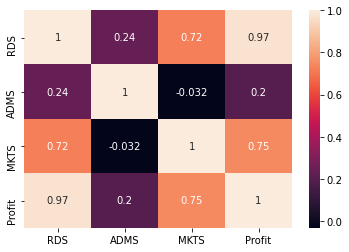

In [26]:
sn.heatmap(data=corr,annot=True)

### linearity Test

<function matplotlib.pyplot.show(close=None, block=None)>

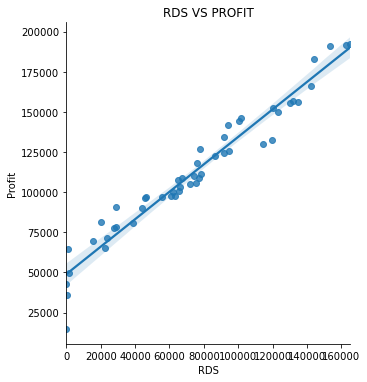

In [19]:
sn.lmplot(x='RDS',y='Profit',data=startup_data)
plt.title('RDS VS PROFIT')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

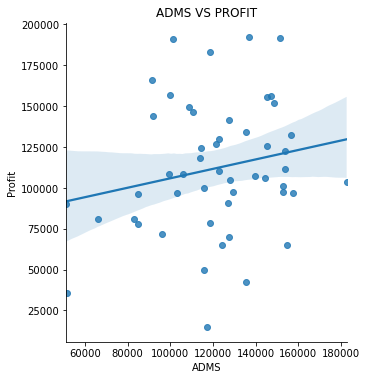

In [20]:
sn.lmplot(x='ADMS',y='Profit',data=startup_data)
plt.title('ADMS VS PROFIT')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

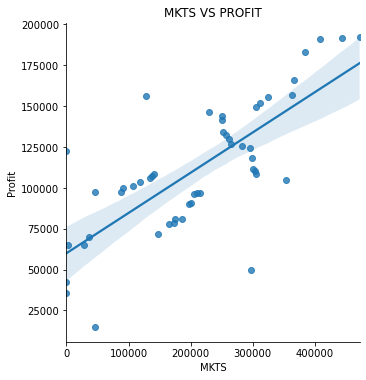

In [21]:
sn.lmplot(x='MKTS',y='Profit',data=startup_data)
plt.title('MKTS VS PROFIT')

plt.show

# normaility test

<AxesSubplot:xlabel='RDS', ylabel='Density'>

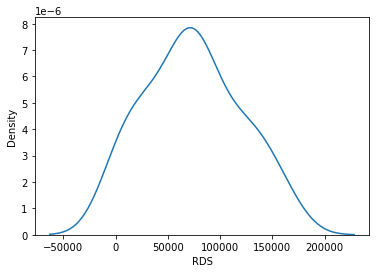

In [22]:
sn.kdeplot(x='RDS',data=startup_data)

<AxesSubplot:xlabel='ADMS', ylabel='Density'>

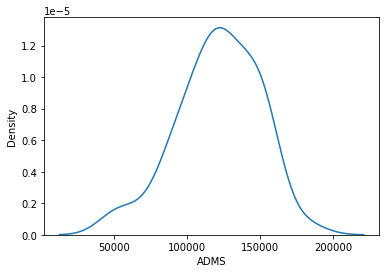

In [23]:
sn.kdeplot(x='ADMS',data=startup_data)

<AxesSubplot:xlabel='MKTS', ylabel='Density'>

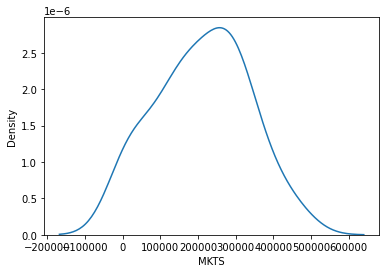

In [24]:
sn.kdeplot(x='MKTS',data=startup_data)

# MODEL BUILDING

In [27]:
import statsmodels.formula.api as smf

In [29]:
model=smf.ols('Profit~RDS+ADMS+MKTS',data=startup_data).fit()

In [30]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [33]:
print('R square value', model.rsquared.round(4))
print('R square Adj ', model.rsquared_adj.round(4))
print('Aic value ', model.aic)
print('bic value ', model.bic)
print('p value ', model.pvalues)


R square value 0.9507
R square Adj  0.9475
Aic value  1058.7714985998055
bic value  1066.419590621518
p value  Intercept    1.057379e-09
RDS          2.634968e-22
ADMS         6.017551e-01
MKTS         1.047168e-01
dtype: float64


In [34]:
model1=smf.ols('Profit~RDS+MKTS',data=startup_data).fit()

In [35]:
print('R square value', model1.rsquared.round(4))
print('R square Adj ', model1.rsquared_adj.round(4))
print('Aic value ', model1.aic)
print('bic value ', model1.bic)
print('p value ', model1.pvalues)


R square value 0.9505
R square Adj  0.9483
Aic value  1057.070772191826
bic value  1062.8068412081107
p value  Intercept    3.504062e-22
RDS          6.040433e-24
MKTS         6.003040e-02
dtype: float64


In [36]:
model2=smf.ols('Profit~RDS+ADMS',data=startup_data).fit()

In [37]:
print('R square value', model2.rsquared.round(4))
print('R square Adj ', model2.rsquared_adj.round(4))
print('Aic value ', model2.aic)
print('bic value ', model2.bic)
print('p value ', model2.pvalues)


R square value 0.9478
R square Adj  0.9456
Aic value  1059.6636934567293
bic value  1065.3997624730139
p value  Intercept    5.695336e-12
RDS          2.278348e-31
ADMS         2.888932e-01
dtype: float64


#    MODEL 1 IS GOOD AS COMPARE TO OTHERS

In [39]:
rsq_r=smf.ols("RDS~ADMS+MKTS",data=startup_data).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=startup_data).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=startup_data).fit().rsquared
vif_m=1/(1-rsq_m)

# storing the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


# WE CAN CONFIRM THAT THERE IS NO MULTICOLINEARITY

In [41]:
import statsmodels.api as sm

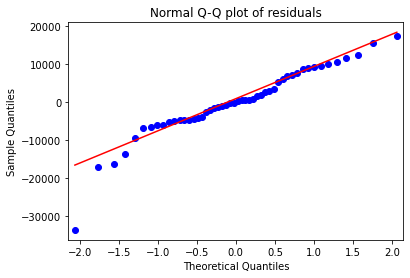

In [42]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot)

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

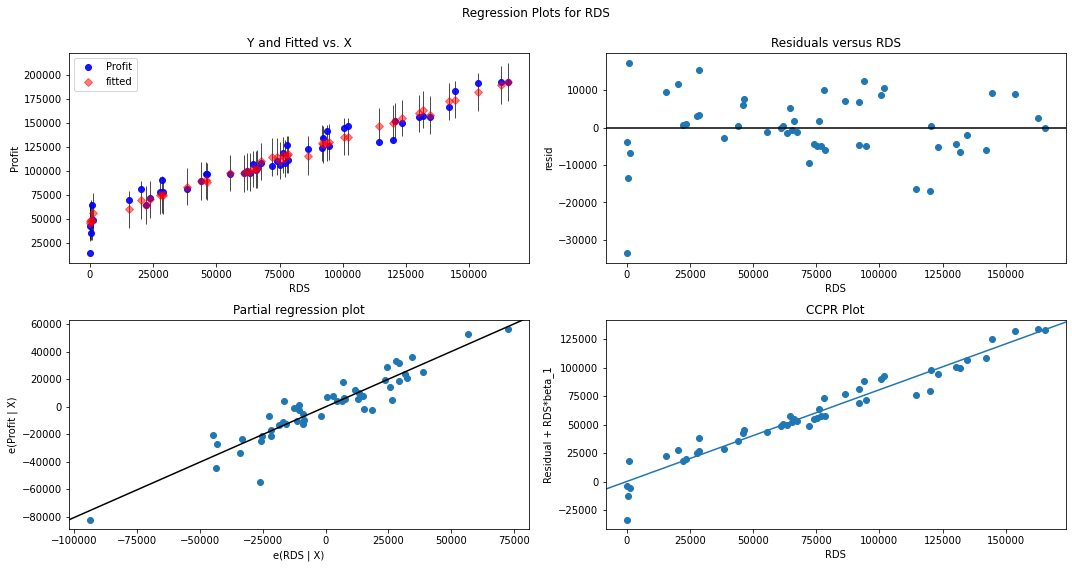

In [43]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

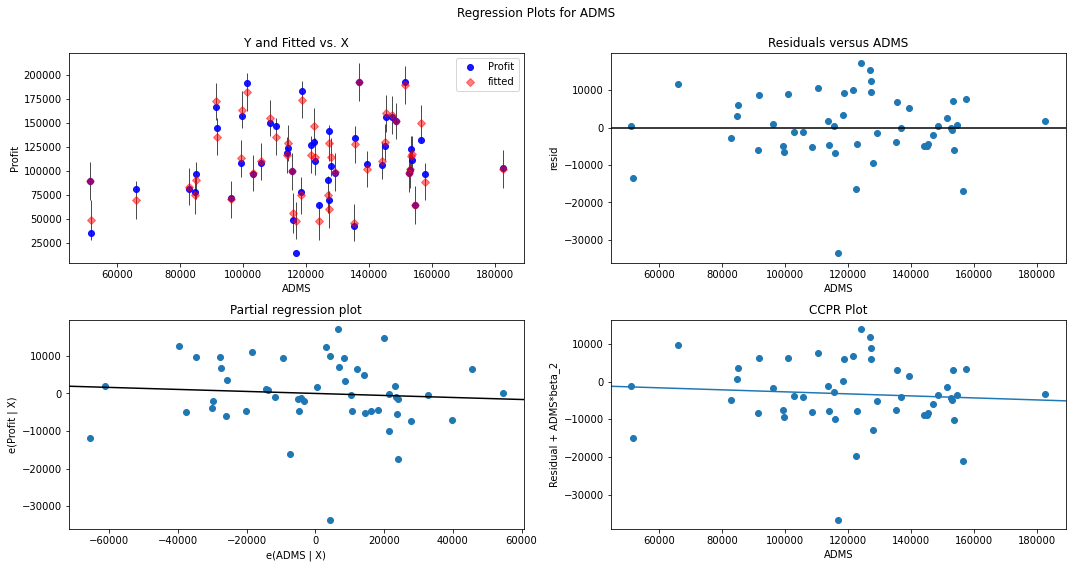

In [44]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

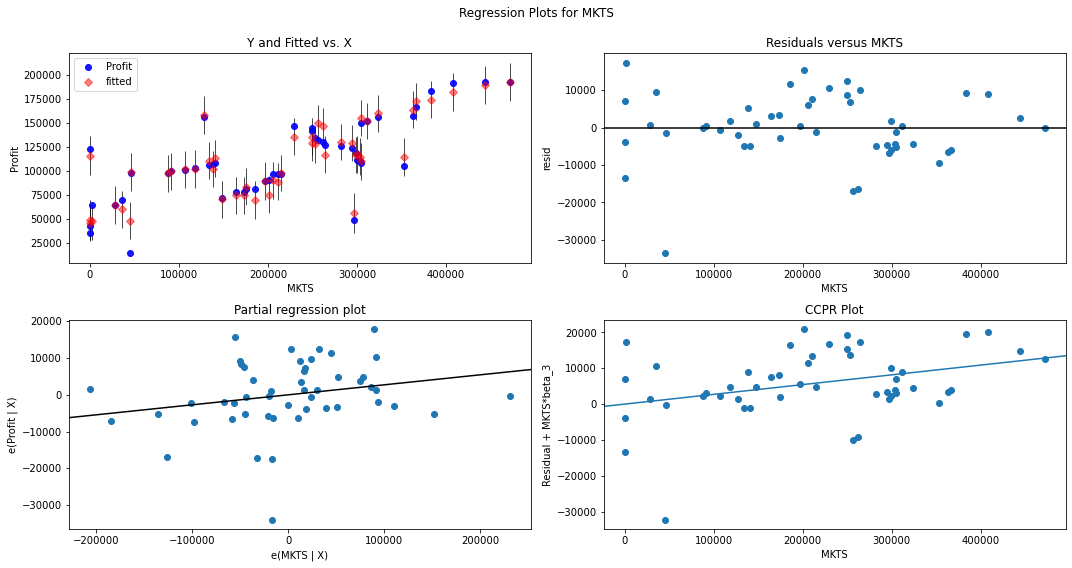

In [45]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

# homascadescity is failed here so there is  outlier un the model

# Model Deletion Diagnostics
## Detecting Influencers/Outliers
 ### Cook’s Distance

In [46]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

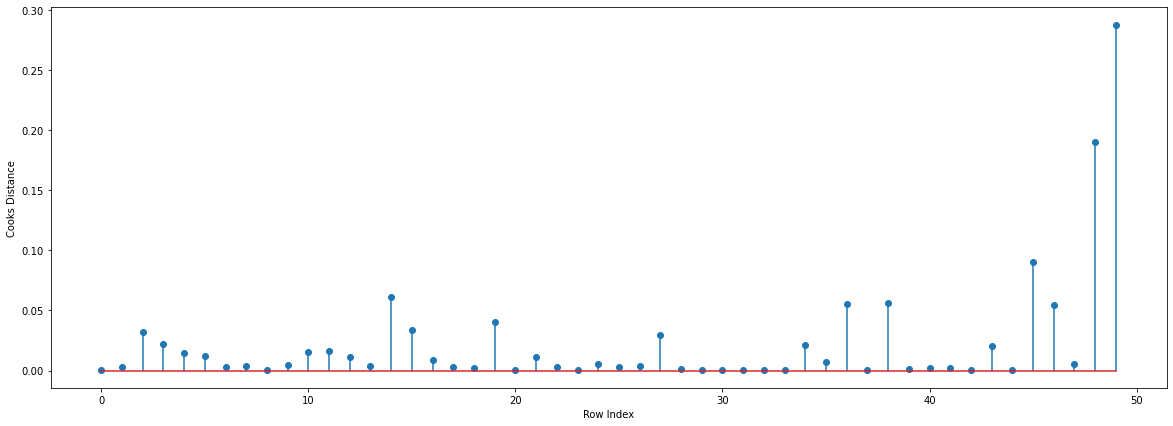

In [49]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup_data)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [50]:
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

In [51]:
k=startup_data.shape[1]
n=startup_data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.3

In [53]:
startup_data2=startup_data.drop(startup_data.index[[49]],axis=0).reset_index(drop=True)
startup_data2

,RDS,ADMS,MKTS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [54]:
while np.max(c)>0.3 :
    model=smf.ols("Profit~RDS+ADMS+MKTS",data=startup_data2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    startup_data2=startup_data2.drop(startup_data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    startup_data
else:
    final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=startup_data2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [55]:
print('R square value', final_model.rsquared.round(4))
print('R square Adj ', final_model.rsquared_adj.round(4))
print('Aic value ',final_model.aic)
print('bic value ', final_model.bic)
print('p value ', final_model.pvalues)

R square value 0.9613
R square Adj  0.9587
Aic value  1020.5652974526367
bic value  1028.1325786450793
p value  Intercept    2.960000e-12
RDS          1.971077e-24
ADMS         6.070728e-01
MKTS         7.458443e-02
dtype: float64


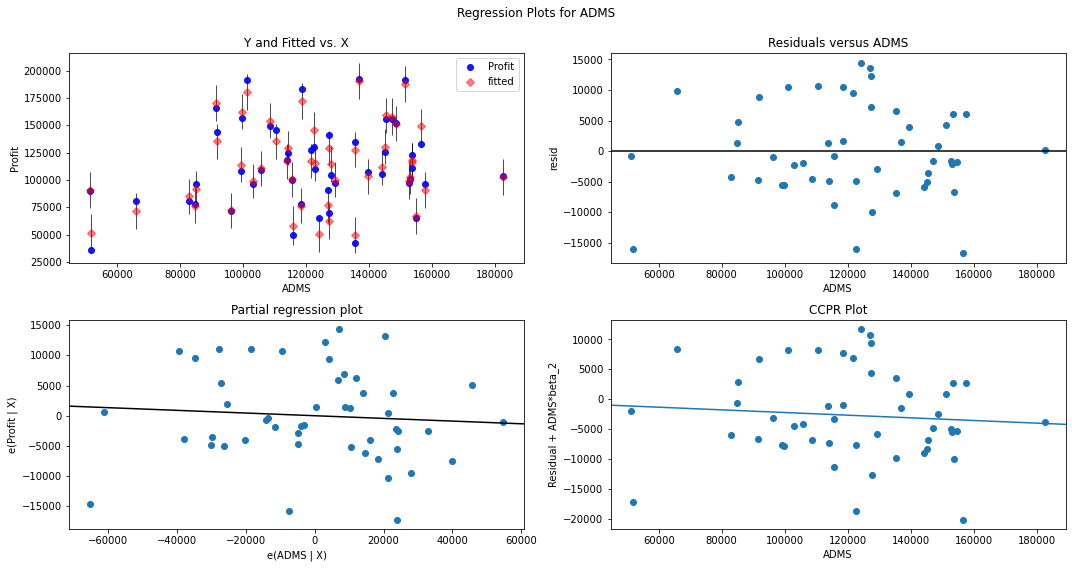

In [59]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(final_model,'ADMS',fig=fig)
plt.show()

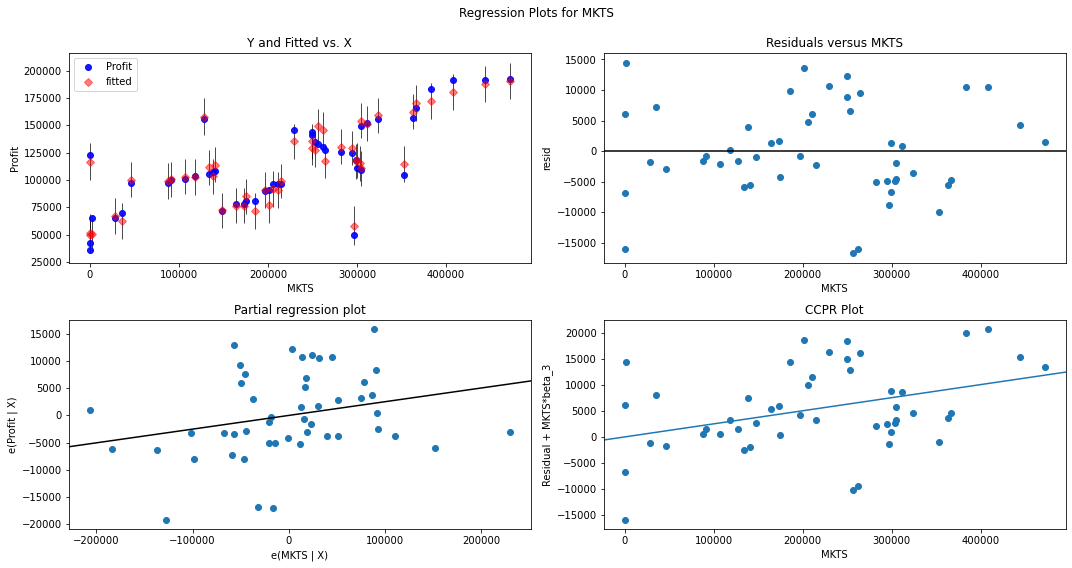

In [62]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(final_model,'MKTS',fig=fig)
plt.show()

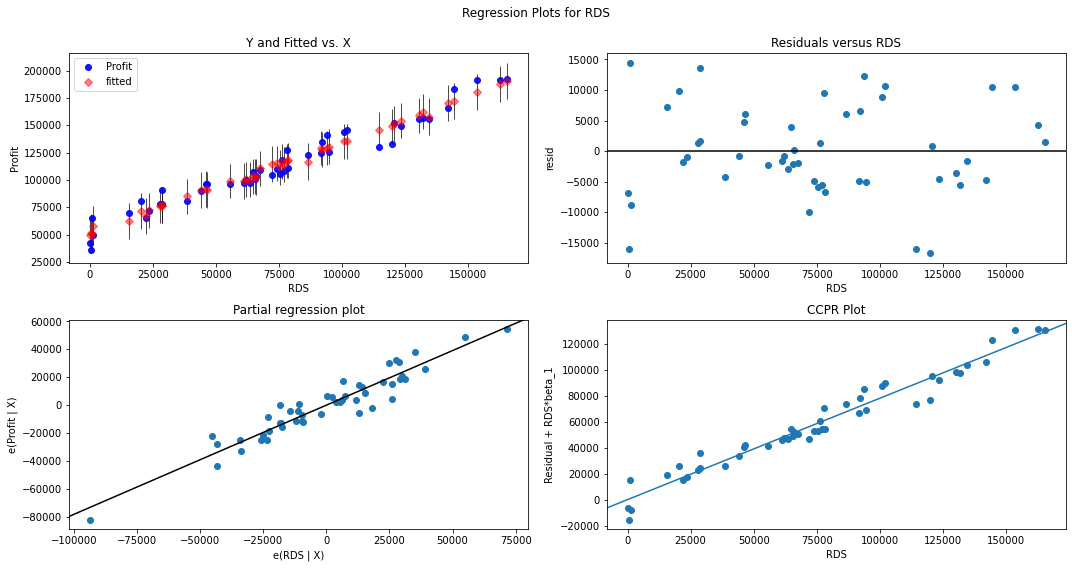

In [64]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(final_model,'RDS',fig=fig)
plt.show()

# now homodecisaity is correct now

In [56]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316


# Predicting for new data

In [57]:
new_data=pd.DataFrame({'RDS':80000,"ADMS":10000,"MKTS":240000},index=[0])
new_data

,RDS,ADMS,MKTS
0,80000,10000,240000


In [58]:
final_model.predict(new_data) #price prediction

0    120856.645201
dtype: float64

# ============================================================

# ===========================================================

# Consider only the below columns and prepare a prediction model for predicting Price.

##### Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [71]:
toyo=pd.read_csv('ToyotaCorolla (1).csv')

In [72]:
toyo

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [73]:
toyo2=pd.concat([toyo.iloc[:,2:4],toyo.iloc[:,6:7],toyo.iloc[:,8:9],toyo.iloc[:,12:14],toyo.iloc[:,15:18]],axis=1)
toyo2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


# Data Understanding

In [74]:
toyo2.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [87]:
toyo2.drop_duplicates(inplace=True)

In [88]:
toyo2.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1, inplace=True)

In [89]:
toyo2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [90]:
crr=toyo2.corr()

<AxesSubplot:>

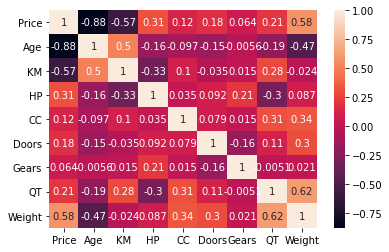

In [91]:
sn.heatmap(data=crr,annot=True)

# Assumption Check

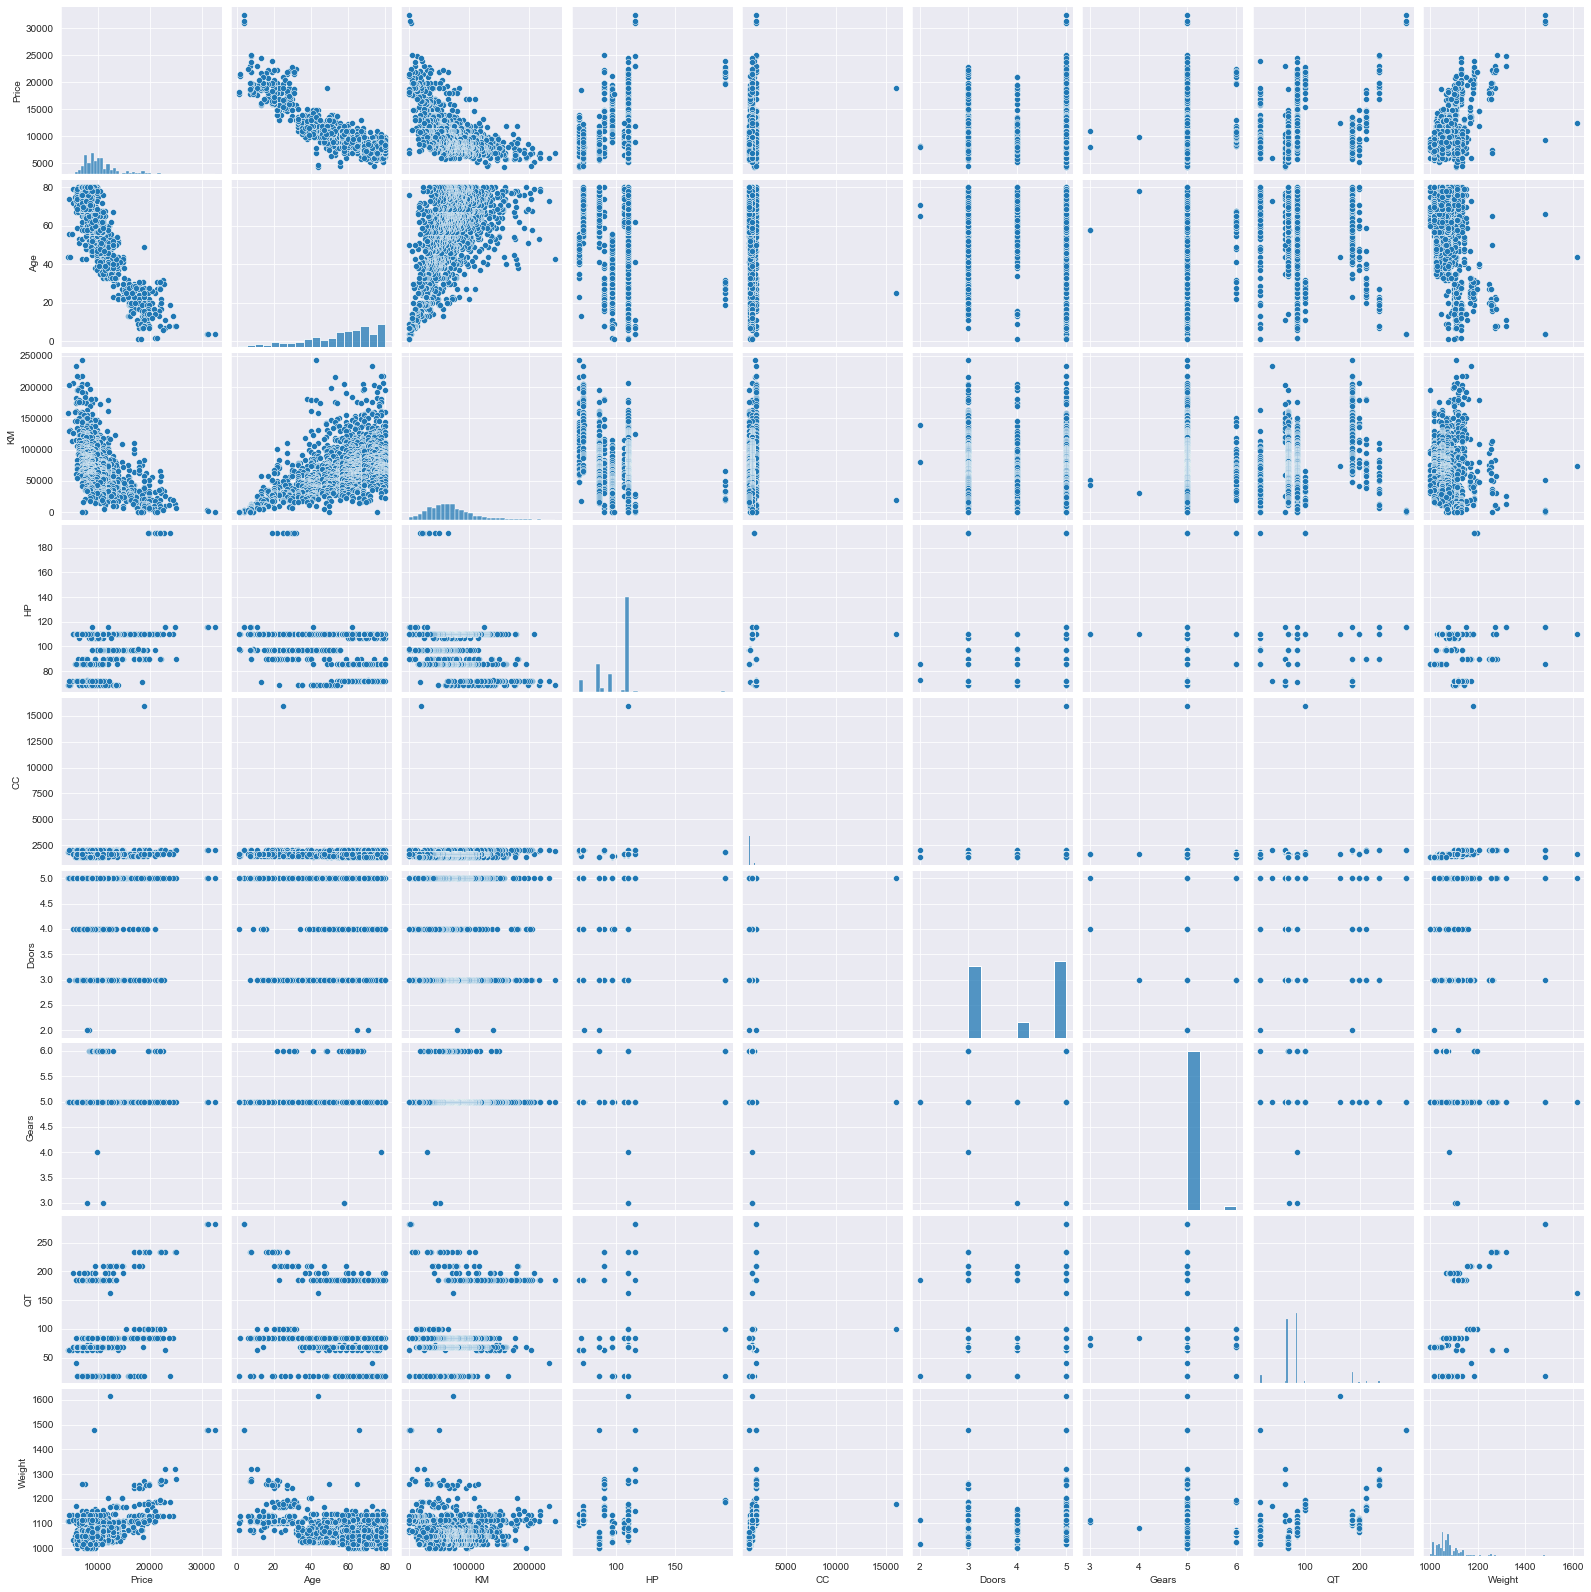

In [93]:
sn.set_style(style='darkgrid')
sn.pairplot(toyo2)

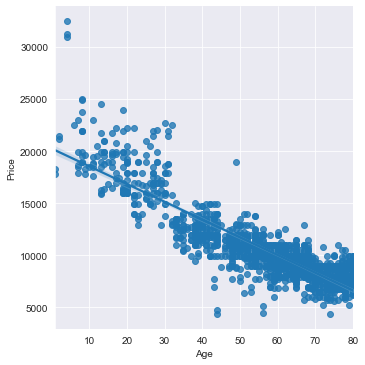

In [95]:
sn.lmplot(x='Age',y='Price',data=toyo2)

In [96]:
#calculating vIF
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyo2).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyo2).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyo2).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toyo2).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toyo2).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toyo2).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toyo2).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toyo2).fit().rsquared
vif_WT=1/(1-rsq_WT)

# storing values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


##### NO MULTICOLINEZRITY SINCE ITS LESS THAN 20 AND NO FEATURES IS VERY HIGH AND ALMOST SAME

# MODEL BUILDING

(      Age     KM   HP    CC  Doors  Gears   QT  Weight
 0      23  46986   90  2000      3      5  210    1165
 1      23  72937   90  2000      3      5  210    1165
 2      24  41711   90  2000      3      5  210    1165
 3      26  48000   90  2000      3      5  210    1165
 4      30  38500   90  2000      3      5  210    1170
 ...   ...    ...  ...   ...    ...    ...  ...     ...
 1431   69  20544   86  1300      3      5   69    1025
 1432   72  19000   86  1300      3      5   69    1015
 1433   71  17016   86  1300      3      5   69    1015
 1434   70  16916   86  1300      3      5   69    1015
 1435   76      1  110  1600      5      5   19    1114
 
 [1435 rows x 8 columns],
       Price
 0     13500
 1     13750
 2     13950
 3     14950
 4     13750
 ...     ...
 1431   7500
 1432  10845
 1433   8500
 1434   7250
 1435   6950
 
 [1435 rows x 1 columns])

In [122]:
modelcorrola=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo2).fit()

In [123]:
print('R square value', modelcorrola.rsquared.round(4))
print('R square Adj ', modelcorrola.rsquared_adj.round(4))
print('Aic value ',modelcorrola.aic)
print('bic value ', modelcorrola.bic)
print('p value ', modelcorrola.pvalues)

R square value 0.8625
R square Adj  0.8617
Aic value  24750.407207346932
bic value  24797.827488500676
p value  Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
CC            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64


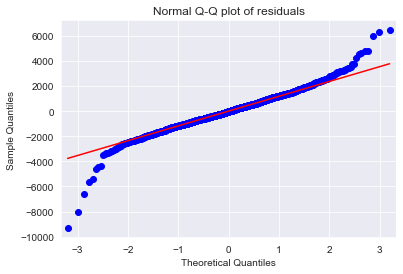

In [124]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot)

sm.qqplot(modelcorrola.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

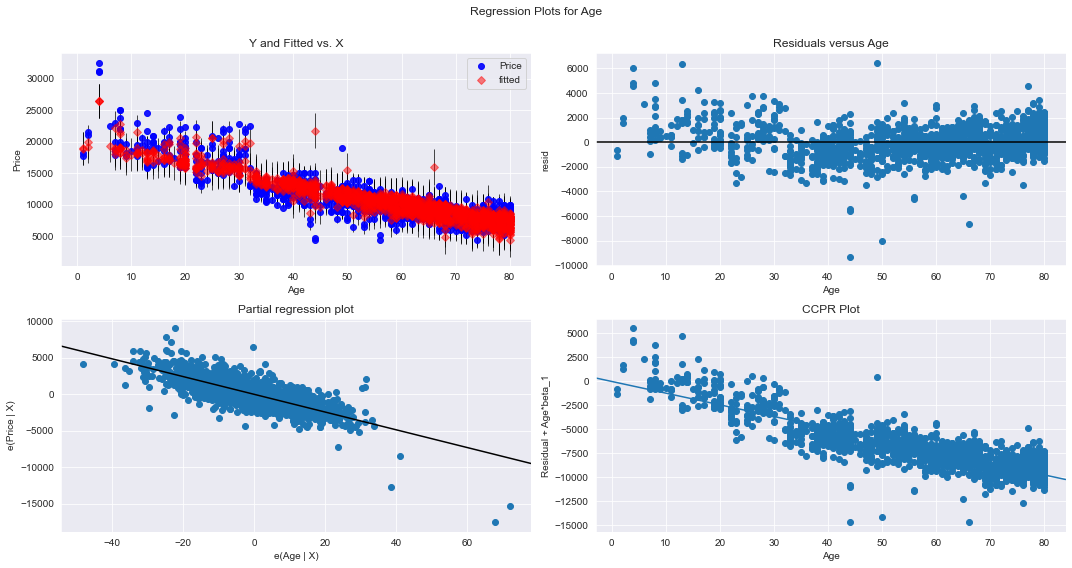

In [125]:
fig=plt.figure(figsize=(15,8))  # residual vs regressor
sm.graphics.plot_regress_exog(modelcorrola,'Age',fig=fig)
plt.show()

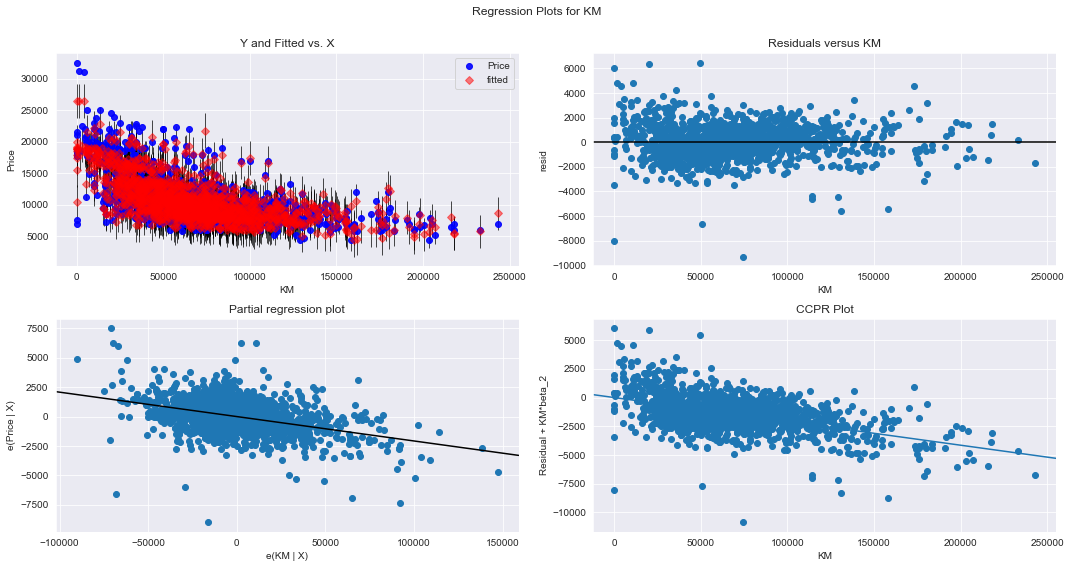

In [126]:
fig=plt.figure(figsize=(15,8))  # residual vs regressor
sm.graphics.plot_regress_exog(modelcorrola,'KM',fig=fig)
plt.show()

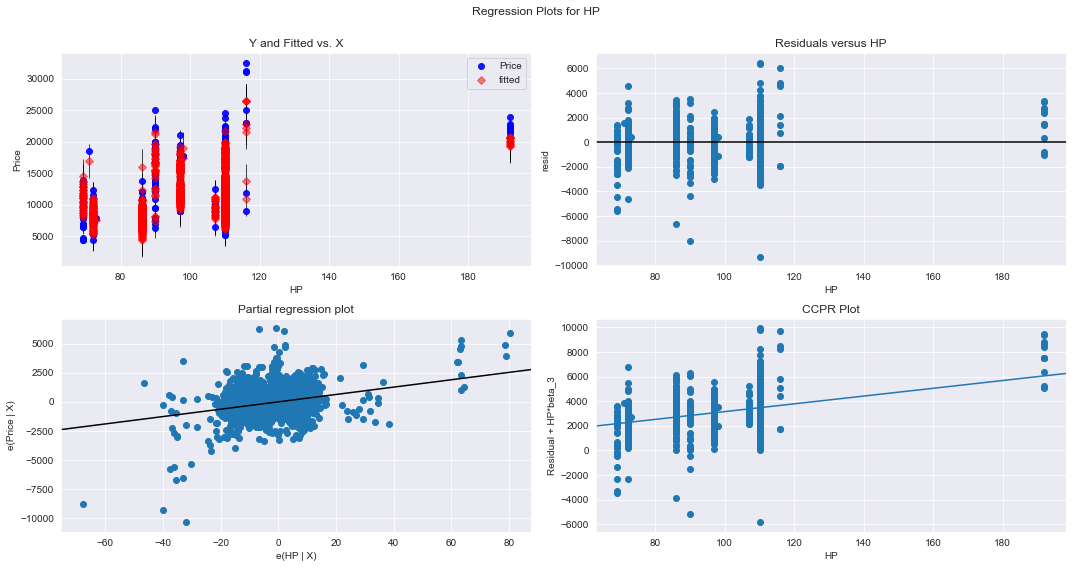

In [127]:
fig=plt.figure(figsize=(15,8))  # residual vs regressor
sm.graphics.plot_regress_exog(modelcorrola,'HP',fig=fig)
plt.show()

# SIMILARY WE CAN FIND MORE FEATURES AND WE SEE THAT THERE IS HOMODESCASITY PORBLEM MENAS OUTLIERS

# Model Deletion Diagnostics
Detecting Influencers/Outliers
Cook’s Distance¶
(c,_)=model.get_influence().cooks_distance
c
(c,_)=model.get_influence().cooks_dista

In [128]:
(c,_)=modelcorrola.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

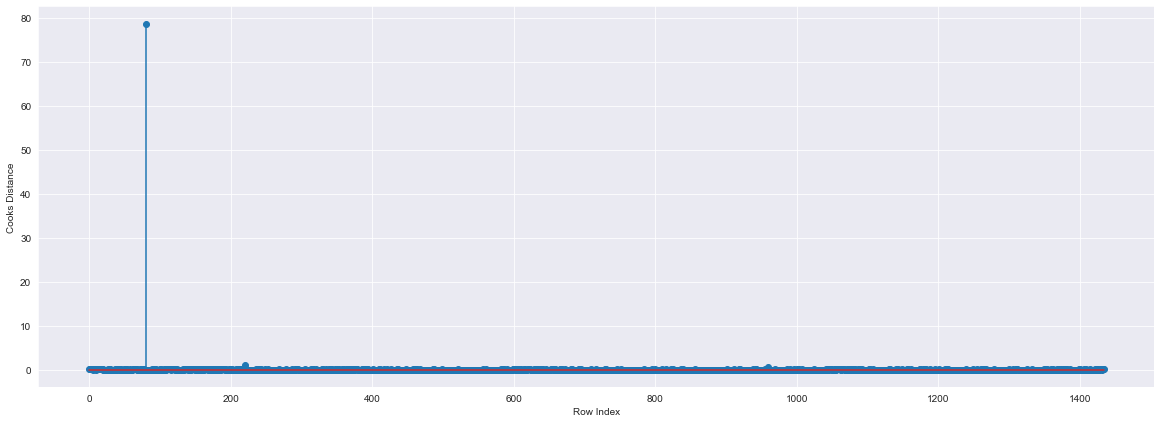

In [129]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyo2)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [130]:
np.argmax(c) , np.max(c)

(80, 78.7295058224851)

In [131]:
k=toyo2.shape[1]
n=toyo2.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

# From the above plot, it is evident that points beyond leverage cutoff value=0.020905 are the outliers1

In [133]:
toyo5=toyo2.drop(toyo2.index[[80]],axis=0).reset_index(drop=True)
toyo5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [139]:
while np.max(c)>0.02 :
    model8=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo5).fit()
    (c,_)=model8.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyo5=toyo5.drop(toyo5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyo5
else:
    final_model3=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo5).fit()
    final_model3.rsquared , final_model3.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8960864004304145


In [140]:
print('R square value', final_model3.rsquared.round(4))
print('R square Adj ', final_model3.rsquared_adj.round(4))
print('Aic value ',final_model3.aic)
print('bic value ', final_model3.bic)
print('p value ', final_model3.pvalues)

R square value 0.8961
R square Adj  0.8955
Aic value  23903.28198914707
bic value  23950.575952437768
p value  Intercept     2.733015e-27
Age          3.627978e-295
KM            4.977130e-50
HP            2.180827e-22
CC            1.232179e-29
Doors         8.605230e-05
Gears         7.525499e-02
QT            4.472354e-01
Weight       1.706006e-118
dtype: float64


In [143]:
d3={'Prep_Models':['Model','Final_Model'],'Rsquared':[modelcorrola.rsquared,final_model3.rsquared]}
table2=pd.DataFrame(d3)
table2

,Prep_Models,Rsquared
0,Model,0.862520
1,Final_Model,0.896086


In [146]:
new_data4=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data4

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [147]:
final_model3.predict(new_data4)

0    14408.234812
dtype: float64

In [148]:
pred_y=final_model3.predict(toyo5)
pred_y

0       16302.663659
1       15853.146696
2       16283.768095
3       15954.295872
4       15840.862415
            ...     
1410     7603.156743
1411     9184.807635
1412     8554.586508
1413     8699.220718
1414     8811.220735
Length: 1415, dtype: float64